Aquesta base de dades recull les experiències laborals que han tingut les persones usuàries del servei.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Experiència Laboral.csv',encoding='utf-8',sep=';')
df_i=df

,Càrrec/Lloc de Feina,ID,Comentaris,Assignat a,Usuari Assignat,Data de Creació,Última Modificació,Creat Per,Modificat Per,Eliminat,...,Modificat Per Nom,modified_by_name_owner,modified_by_name_mod,Creat Per.1,created_by_name_owner,created_by_name_mod,assigned_user_name_owner,assigned_user_name_mod,Persona,stic_experiencia_laboral_contactscontacts_ida
0,PRÀCTIQUES SOLDADURA,139e7156-aa66-17c4-e44e-5e0df5b5841c,Pràctiques dins de l'escola del treball,conxisaes,37ddbfaf-4059-0833-a542-5bee9ed91e9e,02/01/2020 14:50,02/01/2020 14:50,37ddbfaf-4059-0833-a542-5bee9ed91e9e,37ddbfaf-4059-0833-a542-5bee9ed91e9e,0,...,conxisaes,1,Users,conxisaes,1,Users,1,Users,GONZALO NOGALES CAMACHO,f0b9fa20-6d46-3e2b-8d75-5df772cb28d5
1,Auxiliar Administrativa Institut Català de la ...,13b069b4-5842-5919-37cc-5e0dbdea1b44,NaN,sinergiacrm,682001fb-73ed-a21c-6cfb-52416fe0a1a7,02/01/2020 10:54,02/01/2020 10:54,682001fb-73ed-a21c-6cfb-52416fe0a1a7,682001fb-73ed-a21c-6cfb-52416fe0a1a7,0,...,sinergiacrm,1,Users,sinergiacrm,1,Users,1,Users,MONTSE LISA DEL PINO,707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e
2,AUXILIAR ADMINISTRATIVO,142687d0-c8ae-9bec-8aab-5e0dbde9d0c5,NaN,sinergiacrm,682001fb-73ed-a21c-6cfb-52416fe0a1a7,02/01/2020 10:54,02/01/2020 10:54,682001fb-73ed-a21c-6cfb-52416fe0a1a7,682001fb-73ed-a21c-6cfb-52416fe0a1a7,0,...,sinergiacrm,1,Users,sinergiacrm,1,Users,1,Users,JOSÉ ALEJANDRO CHANG GIRÓN,192c9601-2996-00a7-2904-5cee874ded1e
3,REPARTIDOR,156bc421-e60e-98b3-ca36-5e0dbde85709,NaN,sinergiacrm,682001fb-73ed-a21c-6cfb-52416fe0a1a7,02/01/2020 10:54,02/01/2020 10:54,682001fb-73ed-a21c-6cfb-52416fe0a1a7,682001fb-73ed-a21c-6cfb-52416fe0a1a7,0,...,sinergiacrm,1,Users,sinergiacrm,1,Users,1,Users,FERNANDO CARRATALA,b71063b1-c757-200e-69ee-5d9c7a934efd
4,gerent,15b2b0b3-7d78-6967-e038-5e0dbd9d79ae,NaN,sinergiacrm,682001fb-73ed-a21c-6cfb-52416fe0a1a7,02/01/2020 10:54,02/01/2020 10:54,682001fb-73ed-a21c-6cfb-52416fe0a1a7,682001fb-73ed-a21c-6cfb-52416fe0a1a7,0,...,sinergiacrm,1,Users,sinergiacrm,1,Users,1,Users,ALEX PALOMAR MARTINEZ,755a0d82-65a9-f11d-9d91-5e01e6fee9e1


In [3]:
#seleccionem columnes
df=df[['stic_experiencia_laboral_contactscontacts_ida','Càrrec/Lloc de Feina','Empresa','Data inici','Data final','Motiu finalització del contracte']]

In [4]:
df.rename(columns={'stic_experiencia_laboral_contactscontacts_ida':'ID'},inplace=True)

/tmp/ipykernel_13610/454592731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'stic_experiencia_laboral_contactscontacts_ida':'ID'},inplace=True)


In [5]:
df_dic=pd.read_csv('Dict.csv',encoding='utf-8',sep=',')
df['ID'] = df['ID'].map(df_dic.set_index('ID')['IDN'])
df.head()

,IDP,Número d'identificació,ID,IDN
0,GEORGINA ZAMORA AMAT,NaN,c97185e7-9f0f-30e4-b1ff-5bb4a082147f,c97185e7-9f0f-30e4-b1ff-5bb4a082147f
1,LAIA ZAMORA AMAT,NaN,c42ed7e9-f1ad-6ab2-80b0-5bb4a0b8c0f6,c42ed7e9-f1ad-6ab2-80b0-5bb4a0b8c0f6
2,CARME VIDAL LOPEZ,NaN,c1285915-0512-7d67-ca24-5bb4a020d92c,c1285915-0512-7d67-ca24-5bb4a020d92c
3,DOMINGO VIDAL MATEU,38707121F,c5d7f4c8-55b1-a5bb-ee4e-5bb4a06e8f9b,c5d7f4c8-55b1-a5bb-ee4e-5bb4a06e8f9b
4,ELVIRA VIDAL NAVARRO,29200183G,cb11488f-77db-7f36-3a00-5bb4a0cc9388,cb11488f-77db-7f36-3a00-5bb4a0cc9388


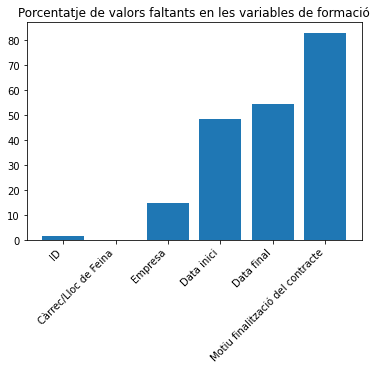

In [7]:
#ver porcentaje de nans por columna
df.isnull().sum()/df.shape[0]*100
#graficar porcentaje de nans
import matplotlib.pyplot as plt
df.isnull().sum()/df.shape[0]*100
plt.bar(df.columns,df.isnull().sum()/df.shape[0]*100)
plt.xticks(rotation=45, ha='right')
plt.title('Porcentatje de valors faltants en les variables de formació')
plt.show()

In [10]:
#Eliminem entrades sense 'ID'
df = df.dropna(subset=["ID"])

In [11]:
df.isnull().sum()/df.shape[0]*100

ID                                   0.000000
Càrrec/Lloc de Feina                 0.000000
Empresa                             14.754098
Data inici                          49.180328
Data final                          55.327869
Motiu finalització del contracte    82.786885
dtype: float64

In [12]:
df=df[['ID','Càrrec/Lloc de Feina','Empresa','Data inici','Data final']]

In [14]:
#pasar Data inici y Data final a forma datetime
df['Data inici']=pd.to_datetime(df['Data inici'])
df['Data final']=pd.to_datetime(df['Data final'])
df.head()

/tmp/ipykernel_13610/3087676023.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Data inici']=pd.to_datetime(df['Data inici'])
/tmp/ipykernel_13610/3087676023.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Data final']=pd.to_datetime(df['Data final'])


,ID,Càrrec/Lloc de Feina,Empresa,Data inici,Data final
0,f0b9fa20-6d46-3e2b-8d75-5df772cb28d5,PRÀCTIQUES SOLDADURA,ESCOLA DEL TREBALL,2019-07-01,NaT
1,707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e,Auxiliar Administrativa Institut Català de la ...,Institut català de la salut,NaT,NaT
2,192c9601-2996-00a7-2904-5cee874ded1e,AUXILIAR ADMINISTRATIVO,NaN,NaT,NaT
3,b71063b1-c757-200e-69ee-5d9c7a934efd,REPARTIDOR,AMAZON,2018-01-01,NaT
4,755a0d82-65a9-f11d-9d91-5e01e6fee9e1,gerent,VINE I QUEDA'T,2008-01-01,2012-01-01


In [15]:
#crear columna con nombre Temps para calcular el tiempo de duración del contrato
df['Temps']=df['Data final']-df['Data inici']
df['Temps']=df['Temps'].dt.days
df.head()

,ID,Càrrec/Lloc de Feina,Empresa,Data inici,Data final,Temps
0,f0b9fa20-6d46-3e2b-8d75-5df772cb28d5,PRÀCTIQUES SOLDADURA,ESCOLA DEL TREBALL,2019-07-01,NaT,NaN
1,707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e,Auxiliar Administrativa Institut Català de la ...,Institut català de la salut,NaT,NaT,NaN
2,192c9601-2996-00a7-2904-5cee874ded1e,AUXILIAR ADMINISTRATIVO,NaN,NaT,NaT,NaN
3,b71063b1-c757-200e-69ee-5d9c7a934efd,REPARTIDOR,AMAZON,2018-01-01,NaT,NaN
4,755a0d82-65a9-f11d-9d91-5e01e6fee9e1,gerent,VINE I QUEDA'T,2008-01-01,2012-01-01,1461.0


In [16]:
df['Temps total experiència'] = df.groupby('ID')['Temps'].transform('sum')
df.head()

,ID,Càrrec/Lloc de Feina,Empresa,Data inici,Data final,Temps,Temps total experiència
0,f0b9fa20-6d46-3e2b-8d75-5df772cb28d5,PRÀCTIQUES SOLDADURA,ESCOLA DEL TREBALL,2019-07-01,NaT,NaN,738.0
1,707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e,Auxiliar Administrativa Institut Català de la ...,Institut català de la salut,NaT,NaT,NaN,0.0
2,192c9601-2996-00a7-2904-5cee874ded1e,AUXILIAR ADMINISTRATIVO,NaN,NaT,NaT,NaN,0.0
3,b71063b1-c757-200e-69ee-5d9c7a934efd,REPARTIDOR,AMAZON,2018-01-01,NaT,NaN,1461.0
4,755a0d82-65a9-f11d-9d91-5e01e6fee9e1,gerent,VINE I QUEDA'T,2008-01-01,2012-01-01,1461.0,7811.0


In [17]:
df['Data incorporació mercat laboral'] = df.groupby('ID')['Data inici'].transform('min')
df.head()


,ID,Càrrec/Lloc de Feina,Empresa,Data inici,Data final,Temps,Temps total experiència,Data incorporació mercat laboral
0,f0b9fa20-6d46-3e2b-8d75-5df772cb28d5,PRÀCTIQUES SOLDADURA,ESCOLA DEL TREBALL,2019-07-01,NaT,NaN,738.0,2018-03-08
1,707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e,Auxiliar Administrativa Institut Català de la ...,Institut català de la salut,NaT,NaT,NaN,0.0,NaT
2,192c9601-2996-00a7-2904-5cee874ded1e,AUXILIAR ADMINISTRATIVO,NaN,NaT,NaT,NaN,0.0,NaT
3,b71063b1-c757-200e-69ee-5d9c7a934efd,REPARTIDOR,AMAZON,2018-01-01,NaT,NaN,1461.0,2001-01-01
4,755a0d82-65a9-f11d-9d91-5e01e6fee9e1,gerent,VINE I QUEDA'T,2008-01-01,2012-01-01,1461.0,7811.0,1997-01-01


In [18]:
#crear columna con cantidad de sesiones por ID
counts = df['ID'].value_counts()
df["Nombre d'experiències"] = df['ID'].map(counts)
df.head()

,ID,Càrrec/Lloc de Feina,Empresa,Data inici,Data final,Temps,Temps total experiència,Data incorporació mercat laboral,Nombre d'experiències
0,f0b9fa20-6d46-3e2b-8d75-5df772cb28d5,PRÀCTIQUES SOLDADURA,ESCOLA DEL TREBALL,2019-07-01,NaT,NaN,738.0,2018-03-08,3
1,707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e,Auxiliar Administrativa Institut Català de la ...,Institut català de la salut,NaT,NaT,NaN,0.0,NaT,4
2,192c9601-2996-00a7-2904-5cee874ded1e,AUXILIAR ADMINISTRATIVO,NaN,NaT,NaT,NaN,0.0,NaT,4
3,b71063b1-c757-200e-69ee-5d9c7a934efd,REPARTIDOR,AMAZON,2018-01-01,NaT,NaN,1461.0,2001-01-01,3
4,755a0d82-65a9-f11d-9d91-5e01e6fee9e1,gerent,VINE I QUEDA'T,2008-01-01,2012-01-01,1461.0,7811.0,1997-01-01,3


In [19]:
df=df[['ID','Data incorporació mercat laboral','Temps total experiència',"Nombre d'experiències"]]
df.head()

,ID,Data incorporació mercat laboral,Temps total experiència,Nombre d'experiències
0,f0b9fa20-6d46-3e2b-8d75-5df772cb28d5,2018-03-08,738.0,3
1,707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e,NaT,0.0,4
2,192c9601-2996-00a7-2904-5cee874ded1e,NaT,0.0,4
3,b71063b1-c757-200e-69ee-5d9c7a934efd,2001-01-01,1461.0,3
4,755a0d82-65a9-f11d-9d91-5e01e6fee9e1,1997-01-01,7811.0,3


In [21]:
df.dtypes

ID                                          object
Data incorporació mercat laboral    datetime64[ns]
Temps total experiència                    float64
Nombre d'experiències                        int64
dtype: object

In [22]:
#pasar Data incorporació mercat laboral a datetime
df['Data incorporació mercat laboral']=pd.to_datetime(df['Data incorporació mercat laboral'])

In [23]:
df.duplicated(['ID']).sum()

116

In [24]:
df.head()

,ID,Data incorporació mercat laboral,Temps total experiència,Nombre d'experiències
0,f0b9fa20-6d46-3e2b-8d75-5df772cb28d5,2018-03-08,738.0,3
1,707b42d9-47ae-6a7b-e5f9-5bf42ebfa31e,NaT,0.0,4
2,192c9601-2996-00a7-2904-5cee874ded1e,NaT,0.0,4
3,b71063b1-c757-200e-69ee-5d9c7a934efd,2001-01-01,1461.0,3
4,755a0d82-65a9-f11d-9d91-5e01e6fee9e1,1997-01-01,7811.0,3


In [25]:
df.dtypes

ID                                          object
Data incorporació mercat laboral    datetime64[ns]
Temps total experiència                    float64
Nombre d'experiències                        int64
dtype: object

In [26]:
# Ordenar el DataFrame por la columna "Data incorporació mercat laboral"
df = df.sort_values('Data incorporació mercat laboral')

# Eliminar las filas duplicadas por la columna "ID" manteniendo la primera aparición de cada valor en dicha columna
df = df.drop_duplicates('ID', keep='first')


In [27]:
#nulls
df.isnull().sum()

ID                                   0
Data incorporació mercat laboral    58
Temps total experiència              0
Nombre d'experiències                0
dtype: int64

In [28]:
(df['Temps total experiència'] == 0).sum()/df.shape[0]*100

53.125

In [29]:
(df['Temps total experiència'] == 0).sum()


68

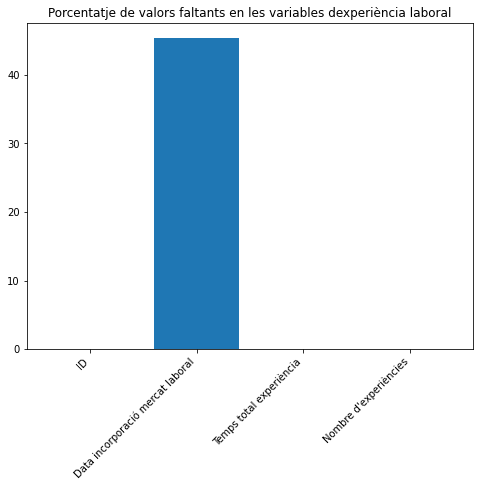

In [30]:
#ver porcentaje de nans por columna
df.isnull().sum()/df.shape[0]*100
#graficar porcentaje de nans
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
df.isnull().sum()/df.shape[0]*100
plt.bar(df.columns,df.isnull().sum()/df.shape[0]*100)
plt.xticks(rotation=45, ha='right')
plt.title('Porcentatje de valors faltants en les variables d''experiència laboral')
plt.show()

In [31]:
df.head()

,ID,Data incorporació mercat laboral,Temps total experiència,Nombre d'experiències
78,1350ea25-b70f-e703-8caa-5bf42e3dfcf9,1973-01-01,17531.0,3
155,73cdac6b-08ba-a222-a40c-5e1c7f019eba,1984-01-01,6511.0,2
204,3a3d06c2-bb7c-8950-f1c6-5bf42e2462bb,1987-02-02,12007.0,3
141,39f4a1f5-2888-c6f3-08a5-6045f9ae0c08,1988-01-01,14244.0,2
61,c048bc39-7722-1cb8-9fc7-5ee8e1447f18,1988-01-03,11794.0,2


In [34]:
#pasar df_experiencia_laboral a csv
df.to_csv('experiencia_laboral_final.csv', index=False, encoding='utf-8')